In [77]:
%run -n main.py
%matplotlib inline

In [138]:
%run -n main.py
# tracks = list(load_lastfm_tracks())
# dump_lastfm_tracks(tracks)
tracks = load_lastfm_tracks()

In [140]:
data = [(_.artist.name, _.album.name, _.name, _.timestamp) for _ in tracks if _.timestamp is not None]
tracks_table = pd.DataFrame(data, columns=['artist', 'album', 'track', 'timestamp'])

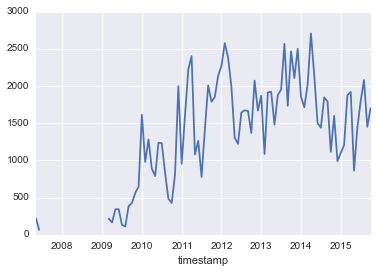

In [141]:
table = tracks_table.groupby('timestamp').size()
table = table.resample('M', how='sum')
table.plot()

In [168]:
%run -n main.py
artist_tracks = Counter((_.artist.name, _.name) for _ in tracks)
missing = 0
for (artist, track), _ in artist_tracks.most_common(2000):
    serp = load_echonest_track_serp(artist, track)
    if not serp['response']['songs']:
        missing += 1
print missing

651


In [165]:
231./700

0.33

In [158]:
download_echonest_track_serp(u'The Hood Internet', 'Infinite Starts')

Search at Echonest "The Hood Internet - Infinite Starts"


{u'response': {u'songs': [],
  u'status': {u'code': 0, u'message': u'Success', u'version': u'4.2'}}}